In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
df = pd.read_csv('archive/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
# Let's identify the important features.
# Administrative - number of pages visited
# Administrative_Duration - time units (s) the user has been in the page
# ProductRelated - number of viewed pages with related products
# SpecialDay - number of days prior to a rather special day (Mother's Day, etc...)
X = df[['Administrative', 'Administrative_Duration', 'ProductRelated', 'SpecialDay'
        , 'ProductRelated_Duration']]
# Revenue - Output
y = df['Revenue']

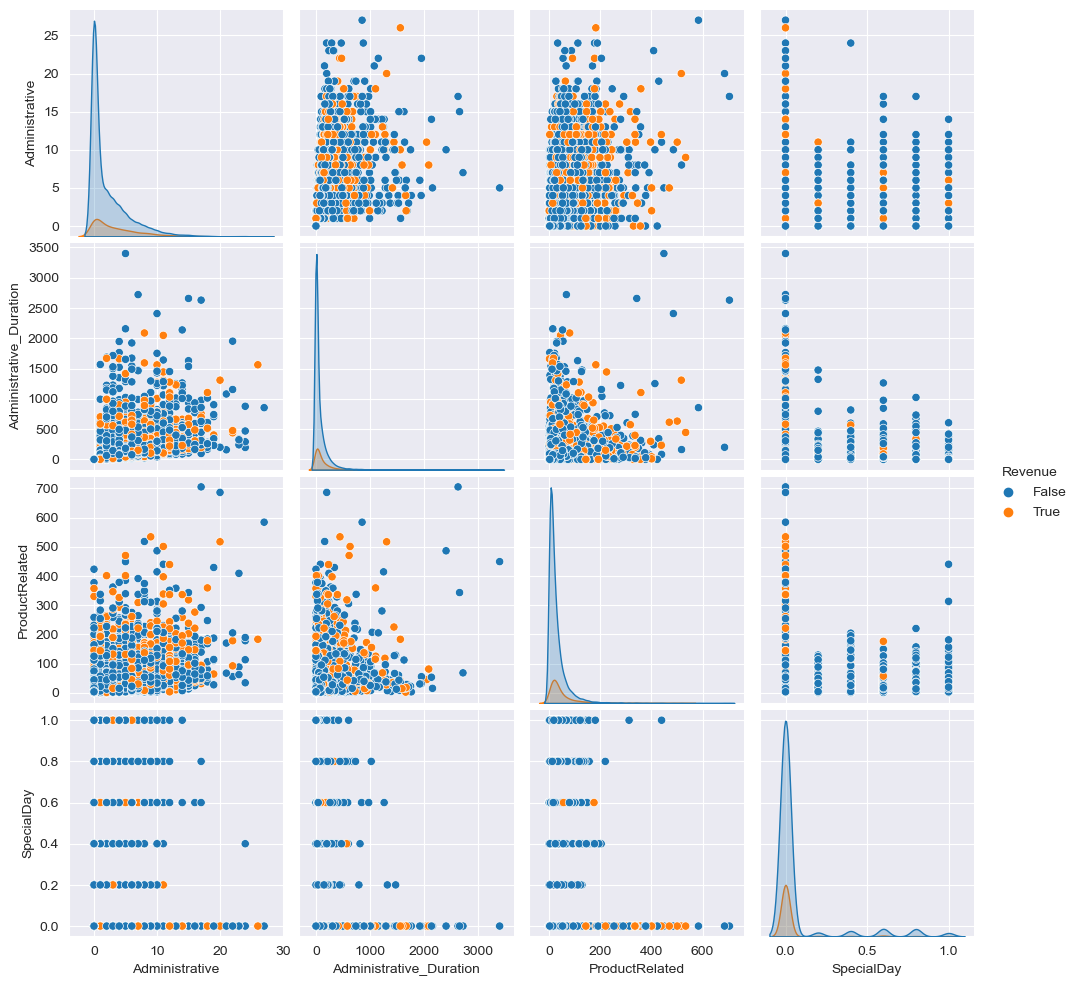

In [14]:
# Let's do EDA
independents = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'SpecialDay']
eda = df[independents + ['Revenue']]
sns.pairplot(eda, hue='Revenue')

# Author: Pactol

In [5]:
# Let's split this data! :) Let's goo!!!

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55)

In [6]:
# Initializing the model!!!! 0v0

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Let's test the accuracy!
y_hat = model.predict(X_test)
score = accuracy_score(y_test, y_hat)
print('The accuracy score is ', score)

The accuracy score is  0.8378378378378378


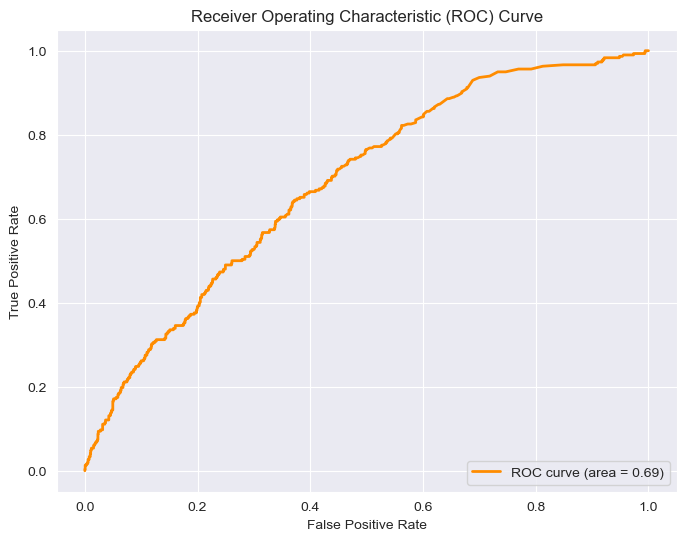

In [15]:
# Let's get the ROC curve to retroactively test for the best threshold
y_probs = model.predict_proba(X_test)[:, 1]
false_positive, true_positive, thresholds = roc_curve(y_test, y_probs)
# area under the curve
roc_auc = auc(false_positive, true_positive)
plt.figure(figsize=(8, 6))
plt.plot(false_positive, true_positive, color='darkorange',  lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Author: Alcordo

In [17]:
import numpy as np

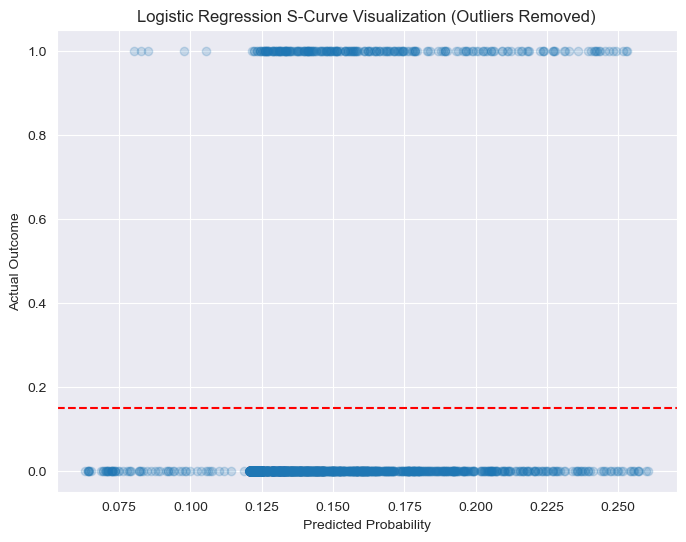

In [27]:
import numpy as np

plt.figure(figsize=(8, 6))

# Define percentiles for outlier removal
lower_percentile = 5
upper_percentile = 95

# Calculate percentile values
lower_bound = np.percentile(y_probs, lower_percentile)
upper_bound = np.percentile(y_probs, upper_percentile)

# Create a mask to filter out outliers
mask = (y_probs >= lower_bound) & (y_probs <= upper_bound)

# Apply mask to probabilities and actual outcomes
filtered_probs = y_probs[mask]
filtered_actuals = y_test.to_numpy()[mask]

# Plotting
plt.scatter(filtered_probs, filtered_actuals, alpha=0.2)

# Adding a line at the default threshold (0.5) to visualize the decision boundary
plt.axhline(y=0.15, color='red', linestyle='--')

# Labelling the axes
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Outcome')
plt.title('Logistic Regression S-Curve Visualization (Outliers Removed)')
plt.show()

#Author: Guinita

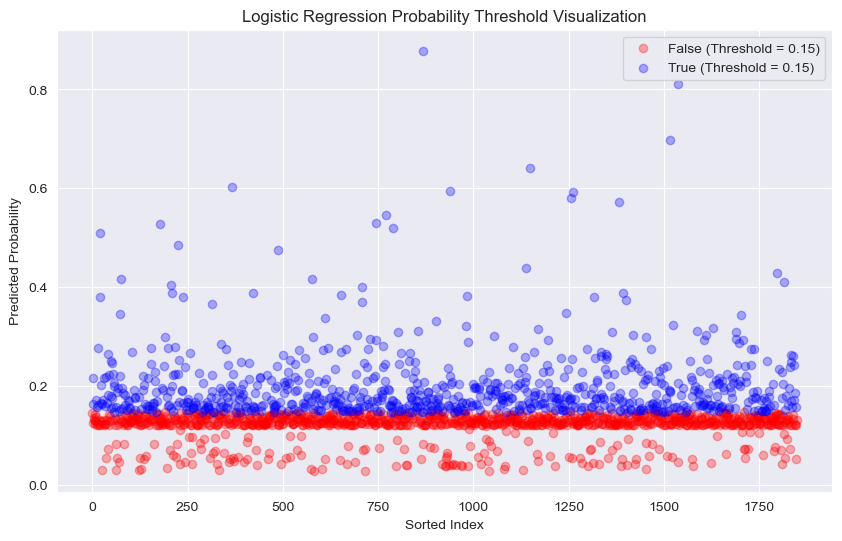

In [24]:
# Find the optimal threshold (closest to top-left corner of ROC curve)
optimal_idx = np.argmax(true_positive - false_positive)
optimal_threshold = thresholds[optimal_idx]

# Apply the threshold to determine the state
states = np.where(y_probs > optimal_threshold, 'True', 'False')

# Visualize the result
plt.figure(figsize=(10, 6))
colors = {'True': 'blue', 'False': 'red', 'Transitioning': 'green'}
for state in np.unique(states):
    mask = states == state
    plt.scatter(np.arange(len(y_probs))[mask], y_probs[mask],
                color=colors[state], label=f'{state} (Threshold = {optimal_threshold:.2f})', alpha=0.3)

plt.xlabel('Sorted Index')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Probability Threshold Visualization')
plt.legend()
plt.show()

#Author: Pactol